In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [71]:
n=1000
B=np.zeros((n,1))
A=np.zeros((n,n))

v=np.logspace(4,np.log10(np.sqrt(24*1.602e-19/m)),n)
v=np.reshape(v,(n,1))
dv=v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)
'''
v=np.arange(1,1001)
v=np.reshape(v,(n,1))
dv=np.ones(n)
'''

'\nv=np.arange(1,1001)\nv=np.reshape(v,(n,1))\ndv=np.ones(n)\n'

In [72]:
np.shape(v)

(1000, 1)

In [73]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [74]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return v**3*vm(v)*m/(m0*v**2) + 2*v*q**2*E**2/(m*vm(v))/(3*m*v**2)#(k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [75]:
def alpha(i):
    return a(v[i])/dv[i]**2
def beta(i):
    return -(2*a(v[i])/dv[i]**2+b(v[i])/dv[i])
def gamma(i):
    return a(v[i])/dv[i]**2+b(v[i])/dv[i]+c(v[i])

In [76]:
B[0,0]=1
B[1,0]=1

A[0,0]=1
A[1,1]=1
for i in range(2,n-1):
    A[i,i-2]=alpha(i)
    A[i,i-1]=beta(i)
    A[i,i]=gamma(i)
A[n-1,n-1]=1    
#print(A,np.matmul(np.linalg.inv(A),b))       

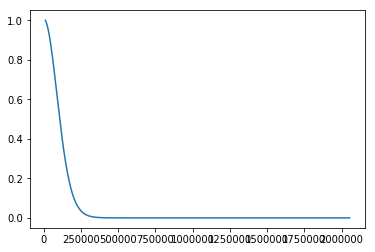

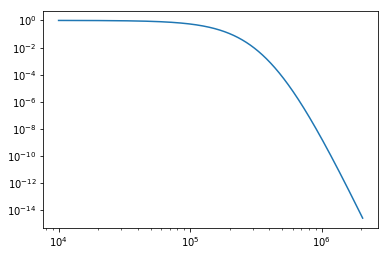

In [77]:
f0=np.matmul(np.linalg.inv(A),B)
plt.plot(v,f0)
plt.show()
plt.loglog(v,f0)
plt.show()

511827.443173


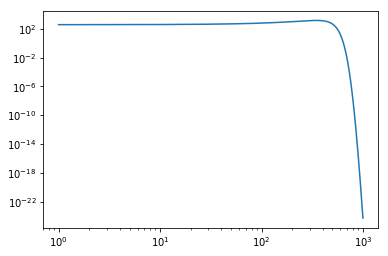

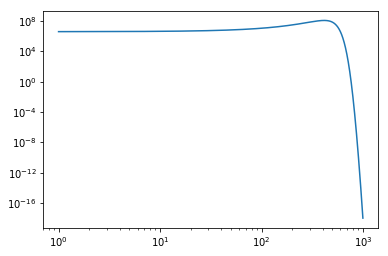

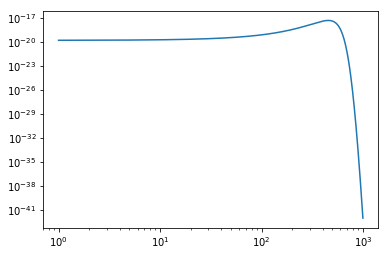

In [85]:
print(np.sum(f0*dv*f0))
plt.loglog(f0*dv*f0)
plt.show()
W=np.sum(f0*v*f0*dv)/np.sum(f0*dv*f0)
plt.loglog(f0*v*f0*dv)
plt.show()
eps=np.sum(f0*0.5*m*v**2*dv)/np.sum(f0*dv*f0)
plt.loglog(f0*0.5*m*v**2*f0*dv)
plt.show()

In [86]:
print(W,eps/1.6e-19)

58347.237447 0.0430755013294


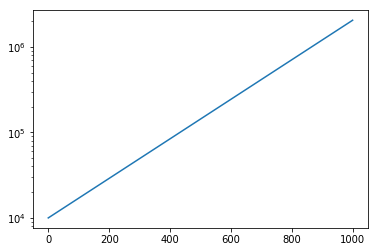

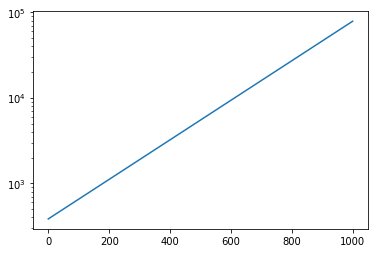

In [80]:
plt.semilogy(v)
plt.show()
plt.semilogy(dv)
plt.show()

In [81]:
W0=0.593e4
eps0=0.7291*1.6e-19

In [82]:
q*1e-21*np.sqrt(m/2/1.6e-19)/m/5e-20

5934.1474011609052

In [83]:
q*E/(m*vm(2))

5934.1474011609043

In [84]:
vm(2)

2.9633694887195528e-14